# SVM 
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.<br>
**Classification** of data is done by choosing a plane which seperates the two classes.
1. SVM also chooses two parallel planes to the seperation plane which pass through 2 nearest points in bothe sides of the dividing plane.
2. Next SVM tries to maximize the distance the distance between these || planes.So it changes the slopes accordingly.In **img 1** many planes are there as options for separating hyperplane.**img 2**<code>shows the best option by using additional 2 planes.</code>
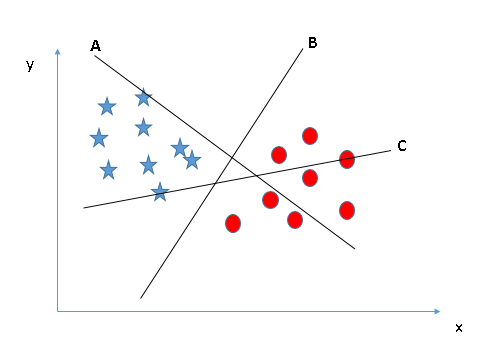  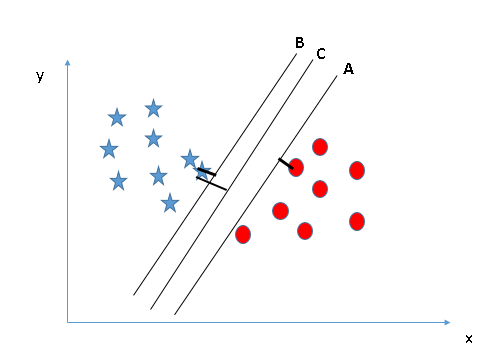

**In real life linearly seperable data is rare and if it is present then classes are quite overlaping.In these cases we need complex functions to seperate these classe which is impossible for linear hyperplane.**
<br>This can be done by increasing the dimension of data.**e.g** from 2D to 3D data.
<br>below is a 2D data. Which is not linearly seperable
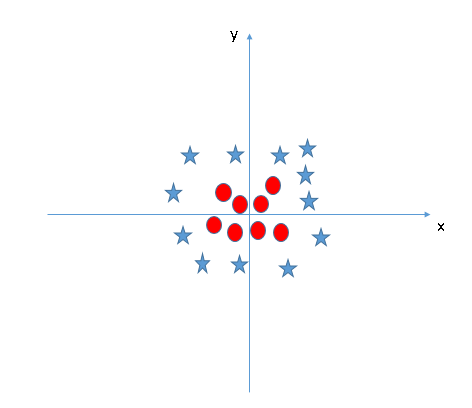
<br>SVM can solve this problem. Easily! It solves this problem by introducing additional feature. Here, we will add a new feature z=x^2+y^2. Now, let’s plot the data points on axis x and z:
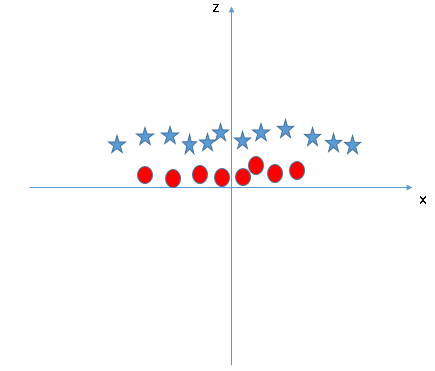
#### SVM Kernels : 
svm kernels transform the data into higher dimension.<br>
types :
1. Linear Kernel
2. Polynomial Kernel
3. RBF Kernel
4. Sigmoid Kernel<Br>
**Linear Kernel :** A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.<br>
<code>K(x, xi) = sum(x * xi)</code><br>
**Polynomial Kernel :** A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.<br>
    let we have two feature data set x1,x2<br>
  
Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.<br>

**Radial Basis Function Kernel :** The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.<br>
    <code>K(x,xi) = exp(-gamma * sum((x – xi^2))</code>
      
#### Tuning Hyperparameters: 
**Kernel:** The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF).This transformation can lead to more accurate classifiers.<br>
**Regularization:** Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.<br>
**Gamma:**A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.


In [64]:
import pandas as pd 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
%matplotlib inline

In [65]:
row_data=load_iris()
df=pd.DataFrame(row_data.data,columns=row_data.feature_names)
df['Target']=row_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
df=df.sample(frac=1)
df=df.reset_index()
df=df.iloc[:,-5:]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,6.7,3.1,4.4,1.4,1
1,6.7,3.1,5.6,2.4,2
2,5.6,2.7,4.2,1.3,1
3,6.4,2.9,4.3,1.3,1
4,5.2,3.4,1.4,0.2,0


In [67]:
x=df.iloc[:,:-1]
y=df.Target
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [68]:
model.score(x_test,y_test)

0.9333333333333333

In [69]:
### Hyper parameter Tuning
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear','poly','rbf'],'C':[1,5,10,20,50,70,100,300,700,1500,5000,10000]}
svc=SVC()
scv_gcv=GridSearchCV(svc,parameters,scoring='accuracy',cv=5)
scv_gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20, 50, 70, 100, 300, 700, 1500, 5000,
                               10000],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [70]:
scv_gcv.best_params_,scv_gcv.best_score_


({'C': 1, 'kernel': 'linear'}, 0.9833333333333334)

In [35]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [35]:
data=pd.read_csv('C:/Users/vikash arya/datascience/datascience_krishnaik/data_sets/titanic_train.csv')
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# capturing Cabin NANs followed by replacing the NANs by "Missing"
import numpy as np
data['missing_cabin']=np.where(data['Cabin'].isnull(),1,0)
data['Cabin'].fillna('Missing',inplace=True)
data.Age.fillna(data.Age.dropna().mean(),inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,missing_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,1


In [39]:
data.dropna(inplace=True)
l=[]
for i in data.Cabin:
    l.append(str(i)[0])
data['Cabin_initial']=l
data=data.drop(['Cabin','Pclass','Name','Ticket','PassengerId'],axis=1)
data=pd.get_dummies(data,drop_first=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,missing_cabin,Sex_male,Embarked_Q,Embarked_S,Cabin_initial_B,Cabin_initial_C,Cabin_initial_D,Cabin_initial_E,Cabin_initial_F,Cabin_initial_G,Cabin_initial_M,Cabin_initial_T
0,0,22.0,1,0,7.2500,1,1,0,1,0,0,0,0,0,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,0,1,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,1,0,1,0,0,0,0,0,0,1,0


In [ ]:
x=data.drop('Survived',axis=1)
y=data['Survived']
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
from sklearn.svm import SVC
model=SVC(kernel='linear',C=10)
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [43]:
model=SVC(kernel='poly')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6292134831460674

In [44]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6797752808988764